In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)
from XCrystal import *
t0 = time.time()

In [2]:
omega= 17450.0
xcr = XCrystal(XCr_path+'/config/Si440_17p45keVDislk60degGronkowski.yaml',omega)
pp=xcr.configure(0,0)
pp

In [3]:

def single_realization_with_data(delta_theta,Rock_angle):
    
    xcr = XCrystal(XCr_path+'/config/Si440_17p45keVDislk60degGronkowski.yaml',omega)
    xcr.configure(delta_theta,Rock_angle)
    xcr.run3D()
    return xcr.Reflectivity, xcr.Transmission, xcr.U1_field, xcr.U2_field, xcr.u, xcr.M

In [4]:
omega0=17450

In [5]:
U1_data = []
U2_data = []

Rs, Ts, U1_xyz, U2_xyz, up, MM = single_realization_with_data(0e-6,omega0)
U1_data.append(U1_xyz)
U2_data.append(U2_xyz)

U1_xyz = np.asarray(U1_data)
U2_xyz = np.asarray(U2_data)

Beam propagation progress: 100%|██████████| 500/500 [02:59<00:00,  2.79it/s]


Photon energy (omega):  17450.0 ; Reflectivity:  0.07945836814315162 ; Transmission:  0.4577339679790231


## 

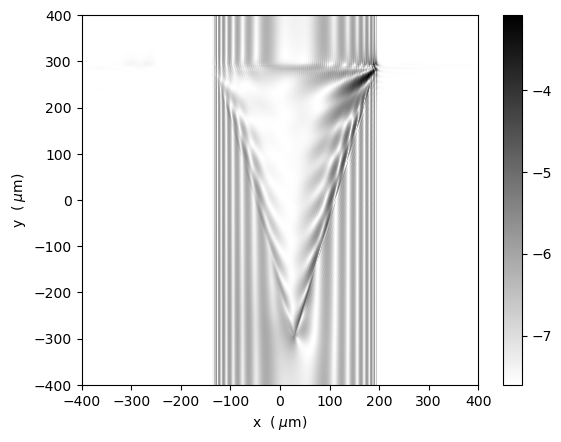

In [11]:
pp=499
ints=np.abs(U1_xyz[0,:,:,pp]*1 + U2_xyz[0,:,:,pp]*0)**(2)
ints=np.transpose(ints)
#ints=np.flipud(ints)
ints=np.fliplr(ints)
plt.imshow(1*(1-np.exp(-120*ints)),extent=[-xcr.xx.max()/xcr.convr*1e6,xcr.xx.max()/xcr.convr*1e6,xcr.yy.min()/xcr.convr*1e6,xcr.yy.max()/xcr.convr*1e6], aspect='auto',cmap='gray_r')
plt.imshow(np.log(ints+0.0005),extent=[-xcr.xx.max()/xcr.convr*1e6,xcr.xx.max()/xcr.convr*1e6,xcr.yy.min()/xcr.convr*1e6,xcr.yy.max()/xcr.convr*1e6], aspect='auto',cmap='gray_r')
#plt.ylim(150, 500)
#plt.xlim(200,700)
plt.ylabel(r'y  ( $\mu$m)')
plt.xlabel(r'x  ( $\mu$m)')
plt.colorbar()

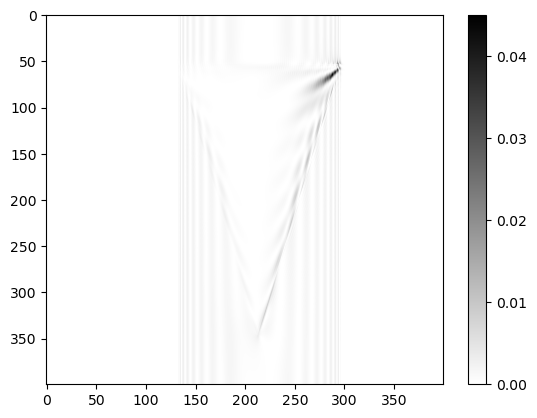

In [12]:
plt.imshow(ints, aspect='auto',cmap='gray_r')
plt.colorbar()

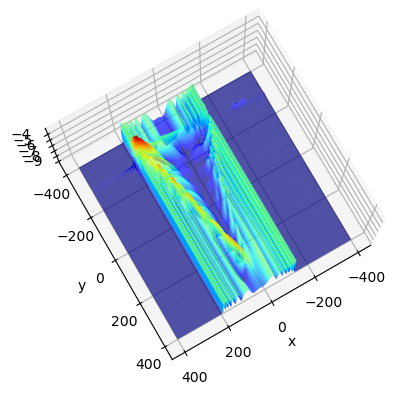

In [13]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
#Z=ints
Z=np.log(ints+0.0001)
X, Y = np.meshgrid(xcr.xx/xcr.convr*1e6,xcr.yy/xcr.convr*1e6)
ax.plot_surface(X,Y,Z, rstride=1, cstride=1,
                cmap='jet', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.view_init(80, 60)


(400, 400, 500)

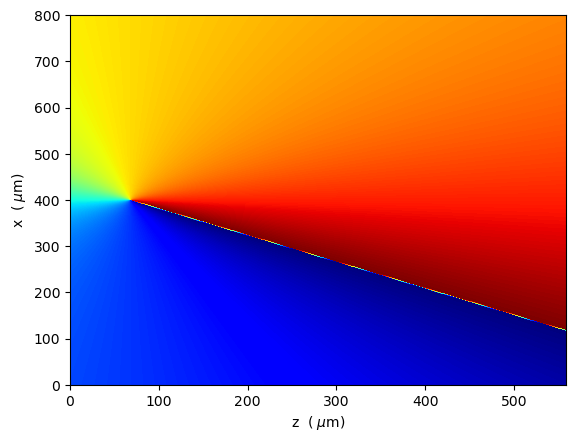

In [14]:
p=50
plt.imshow(xcr.u[:,p,0:xcr.M-1],extent=[0,xcr.M*xcr.Z/xcr.convr*1e6,0,xcr.xx.max()*2/xcr.convr*1e6], aspect='auto',cmap='jet')
#plt.imshow(np.abs(U1_xyz[0,:,0,:])**2 + np.abs(U2_xyz[0,:,0,:])**2,extent=[0,xcr.M*xcr.Z/xcr.convr*1e6,0,xcr.xx.max()*2/xcr.convr*1e6], aspect='auto',cmap='jet')
#plt.ylim(350, 800)
#plt.xlim(0,300)
plt.ylabel(r'x  ( $\mu$m)')
plt.xlabel(r'z  ( $\mu$m)')
xcr.M*xcr.Z/xcr.convr*1e6
xcr.u.shape

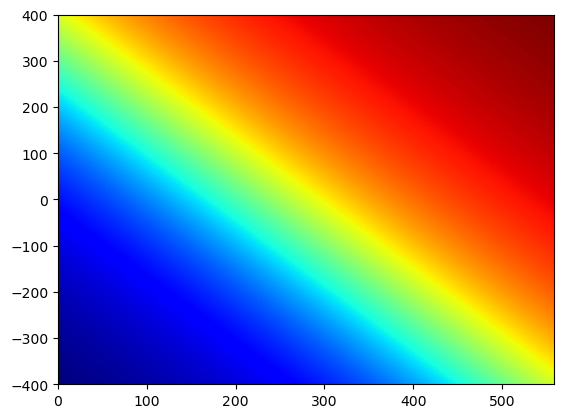

In [15]:
iIndx=125
plt.imshow(xcr.u[iIndx,:,:],extent=[0,xcr.M*xcr.Z/xcr.convr*1e6,-xcr.yy.max()/xcr.convr*1e6,xcr.yy.max()/xcr.convr*1e6], aspect='auto',cmap='jet')

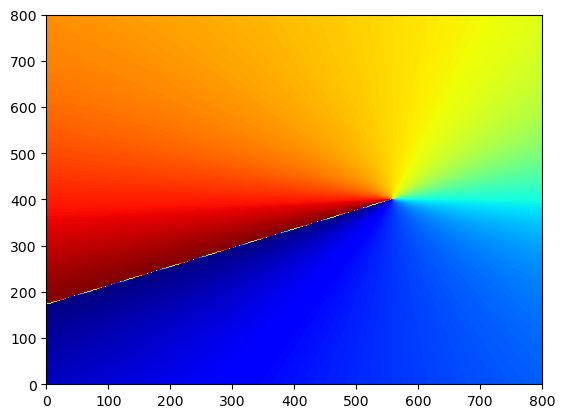

In [16]:
plt.imshow(xcr.u[:,:,350],extent=[0,xcr.xx.max()*2/xcr.convr*1e6,0,xcr.yy.max()*2/xcr.convr*1e6], aspect='auto',cmap='jet')
#plt.ylim(20, 40)
#plt.xlim(480,500)

In [17]:
t1 = time.time()  
print('Time (min):', (t1 - t0)/60)

Time (min): 7.524075531959534
